# Raport o danych - V1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
DIR_DATA = 'data/v1'

In [3]:
artists = pd.read_json(path_or_buf=f'{DIR_DATA}/artists.jsonl', lines=True)
sessions = pd.read_json(path_or_buf=f'{DIR_DATA}/sessions.jsonl', lines=True)
tracks = pd.read_json(path_or_buf=f'{DIR_DATA}/tracks.jsonl', lines=True)

## Artists

In [4]:
artists.head()

,id,name,genres
0,7jVv8c5Fj3E9VhNjxT4snq,Lil Nas X,"[country rap, lgbtq+ hip hop, pop rap, queer c..."
1,0xRXCcSX89eobfrshSVdyu,MEDUZA,"[dance pop, edm, pop dance, pop house, tropica..."
2,3OKg7YbOIatODzkRIbLJR4,TheFatRat,[speedrun]
3,-1,Tanishk Bagchi,"[desi pop, filmi, modern bollywood]"
4,56mfhUDKa1vec6rSLZV5Eg,Jawsh 685,[nz pop]


Już tu można zaobserwować pewną anomalię: -1 jest wartością id znacznie różniącą się od innych. Po sprawdzeniu unikalności tego atrybutu, okazało się że wartość -1 pojawia się aż 91 razy.

In [5]:
non_unique_ids = artists['id'].value_counts().loc[lambda x: x > 1]
print(non_unique_ids)

-1    91
Name: id, dtype: int64


In [6]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1667 non-null   object
 1   name    1667 non-null   object
 2   genres  1585 non-null   object
dtypes: object(3)
memory usage: 39.2+ KB


In [17]:
artists.isnull().sum()

id         0
name       0
genres    82
dtype: int64

Atrybut genres ma 82 puste wartości.

## Sessions

In [7]:
sessions.head()

,session_id,timestamp,user_id,track_id,event_type
0,124,2023-07-15 16:49:17.000,101.0,4YPgTCGJWAlHQ5g6eWoM8r,play
1,125,2023-06-22 07:25:03.547,101.0,4p8QcNkaq2FQj8uGJ7HEDK,play
2,125,2023-06-22 07:29:23.814,101.0,4GKk1uNzpxIptBuaY97Dkj,play
3,125,2023-06-22 07:32:53.270,101.0,4GKk1uNzpxIptBuaY97Dkj,like
4,125,2023-06-22 07:34:23.481,101.0,0ZO2iSS12JTftv10cSCYf8,play


In [8]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26347 entries, 0 to 26346
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   session_id  26347 non-null  int64         
 1   timestamp   26347 non-null  datetime64[ns]
 2   user_id     25038 non-null  float64       
 3   track_id    21501 non-null  object        
 4   event_type  25014 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.0+ MB


In [9]:
sessions.isnull().sum()

session_id       0
timestamp        0
user_id       1309
track_id      4846
event_type    1333
dtype: int64

### Braki:

In [10]:
[_ for _ in sessions['event_type'].unique()]

['play', 'like', 'advertisment', None, 'skip']

In [11]:
event_types = sessions['event_type'].unique() 
event_types = event_types[~pd.isnull(event_types)]

for event_type in event_types:
    missing_track_id_for_event_type = len(sessions[(sessions['event_type'] == event_type) & (sessions['track_id'].isnull())])
    print(f"Liczba brakujących track_id gdy event_type = '{event_type}': {missing_track_id_for_event_type}")


Liczba brakujących track_id gdy event_type = 'play': 675
Liczba brakujących track_id gdy event_type = 'like': 164
Liczba brakujących track_id gdy event_type = 'advertisment': 3540
Liczba brakujących track_id gdy event_type = 'skip': 221


Wiersze z brakami id utworu są błędne - nie mogą być użyte. 

### Rozkład event_type

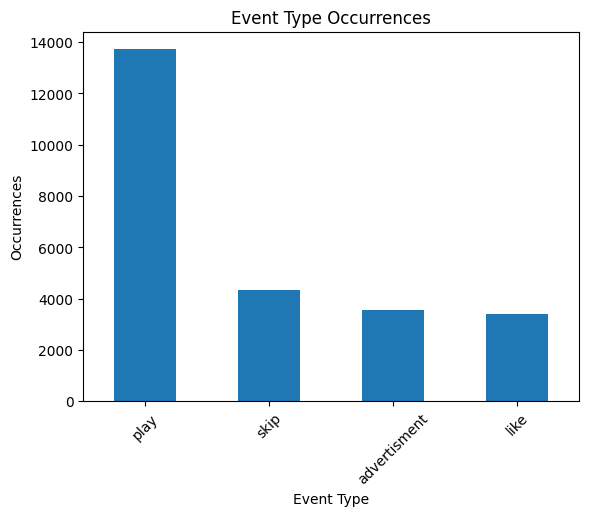

In [12]:
event_counts = sessions['event_type'].value_counts()
event_counts.plot(kind='bar')
plt.xlabel('Event Type')
plt.ylabel('Occurrences')
plt.title('Event Type Occurrences')
plt.xticks(rotation=45)
plt.show()


## Tracks

In [13]:
tracks.head()

,id,name,popularity,duration_ms,explicit,id_artist,release_date,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0RNxWy0PC3AyH4ThH3aGK6,Mack the Knife,55.0,201467,0,19eLuQmk9aCobbVDHc6eek,1929,0.673,0.3770,0,-14.141,0.0697,0.586,0.000000,0.332,0.713,88.973
1,2W889aLIKxULEefrleFBFI,Someone to Watch Over Me,54.0,198000,0,1Mxqyy3pSjf8kZZL4QVxS0,1943,0.204,0.1510,2,-17.842,0.0418,0.947,0.000009,0.321,0.134,91.783
2,4Pnzw1nLOpDNV6MKI5ueIR,Nancy (With the Laughing Face) - 78rpm Version,55.0,199000,0,None,1944,0.295,0.0826,1,-19.569,0.0367,0.984,0.000358,0.156,0.169,128.600
3,7GLmfKOe5BfOXk7334DoKt,Saturday Night (Is The Loneliest Night In The ...,54.0,163000,0,1Mxqyy3pSjf8kZZL4QVxS0,1944,0.561,0.3350,9,-11.093,0.0499,0.840,0.000002,0.788,0.590,126.974
4,6kD1SNGPkfX9LwaGd1FG92,Put Your Dreams Away (For Another Day),53.0,186173,0,1Mxqyy3pSjf8kZZL4QVxS0,1944,0.197,0.0546,1,-22.411,0.0346,0.950,0.276000,0.152,0.100,90.150


In [14]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22412 entries, 0 to 22411
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                21272 non-null  object 
 1   name              21304 non-null  object 
 2   popularity        21322 non-null  float64
 3   duration_ms       22412 non-null  int64  
 4   explicit          22412 non-null  int64  
 5   id_artist         21270 non-null  object 
 6   release_date      22412 non-null  object 
 7   danceability      22412 non-null  float64
 8   energy            22412 non-null  float64
 9   key               22412 non-null  int64  
 10  loudness          22412 non-null  float64
 11  speechiness       22412 non-null  float64
 12  acousticness      22412 non-null  float64
 13  instrumentalness  22412 non-null  float64
 14  liveness          22412 non-null  float64
 15  valence           22412 non-null  float64
 16  tempo             22412 non-null  float6

In [15]:
tracks.isnull().sum()

id                  1140
name                1108
popularity          1090
duration_ms            0
explicit               0
id_artist           1142
release_date           0
danceability           0
energy                 0
key                    0
loudness               0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
dtype: int64

Znaczne braki w atrybutach id, nazwy, popularności i id artysty.

### Rozkład atrybutów

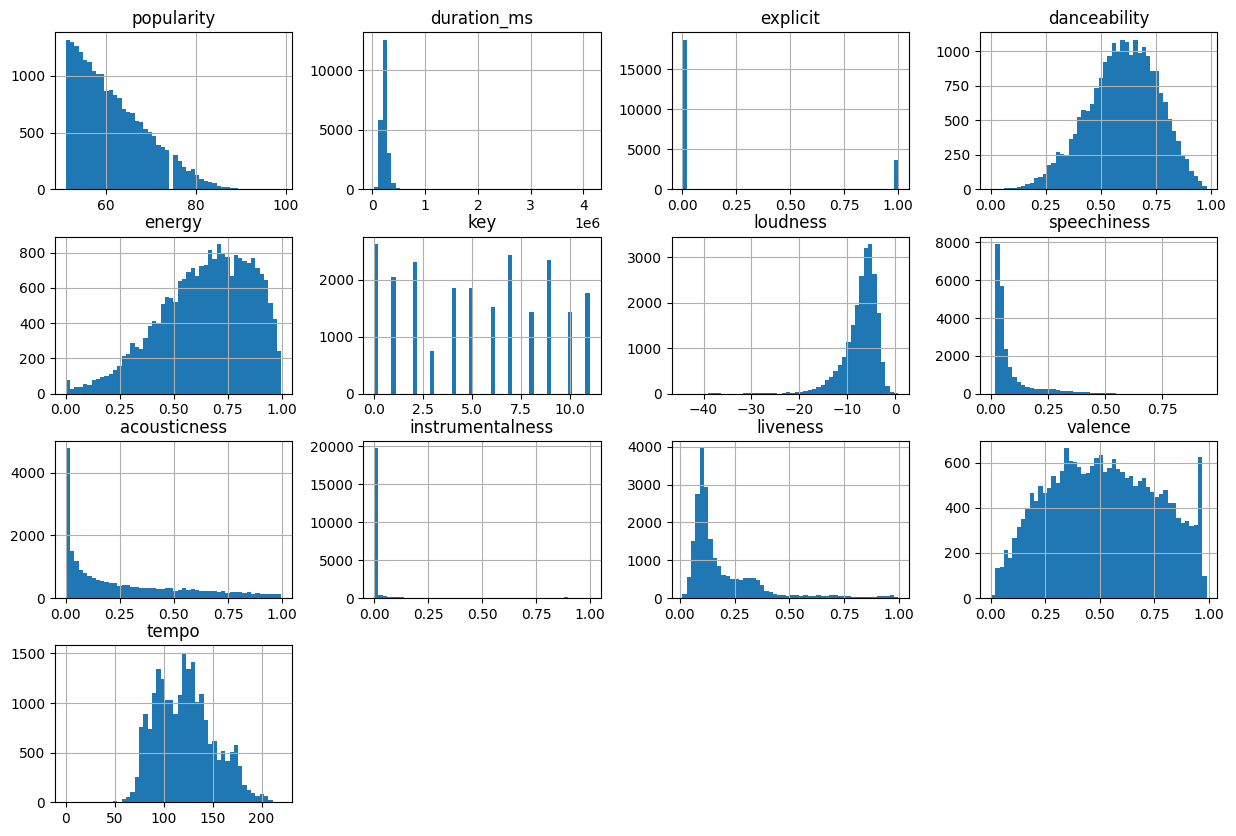

In [16]:
tracks.hist(figsize=(15, 10), bins=50);

Atrybut intrumentalness wydaje się być mocno niezrównoważony.

## Wnioski:
- By stworzyć dokładny model, danych o sesji potrzebnych jest jak najwięcej, idealnie około kilku milionów - by mieć solidne podstawy prognozować tydzień w przyszłość. 
- Dane o utworach (i artystach) powinny obejmować wszystkie możliwe z platformy by móc dokładnie przewidywać top listę. Dodatkowo, braki id, popularności, id artysty i nazwy również muszą zostać rozwiązane.
- Błędy w danych artystów (takie jak powtarzane id = -1) są niedopuszczalne, gdyż nie pozwalają powiązać utworu z jego wykonawcą. Potrzebne są dane nieposiadające takich błędów.
- Braki id utworu i użytkownika oraz typu eventu w sesjach również są niedopuszczalne - potrzebne są naprawione dane.
- Baza użytkowników, jeśli posiada informacje o np. ulubionych utworach / gatunkach / wykonawcach może pomóc w przewidywaniach. Musiałaby być jednak jak najszersza (najlepiej wszyscy użytkownicy), ponieważ upodobania poszczególnych użytkowników są prawdopodobnie zróżnicowane - mniejszy zbiór danych mógłby nie być reprezentatywny. Dodatkowo, jeśli posiada dane osobowe użytkowników, powinny one być z niej wycięte (nie są potrzebne, a stanowią potencjalny problem bezpieczeństwa / prywatności) zostawiając jedynie id użytkownika.